The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


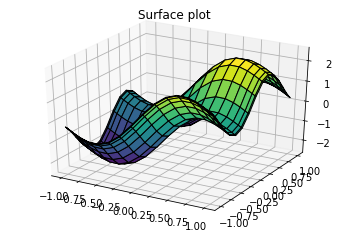

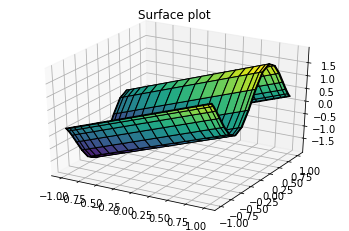

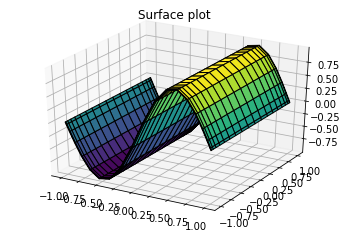

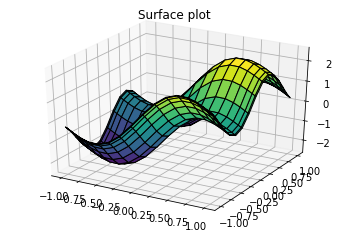

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pypde.bases import *
from pypde.field import *

def plot(xx,yy,f):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(xx, yy, f,cmap='viridis', edgecolor='k')
    ax.set_title('Surface plot')
    plt.show()
    
N,M = 20,20
shape = (N,M)
S = Field(shape,("CD","CN"))

# Space
x,y = S.x, S.y
xx,yy = np.meshgrid(x,y,indexing="ij")
f = np.sin(np.pi* xx)+xx+np.sin(4*yy)#+0.5*xx-0.5

# Boundary conditions
bc = np.zeros((2,M))
bc[0,:] = -1 +np.sin(4*y)
bc[1,:] = 1+np.sin(4*y)

#Sbc = SpectralSpaceBC(bc.shape,("CD","CD"),axis=0,value=bc)

S.v = f
S.add_bc(bc,axis=0)
S.v = S.make_homogeneous(S.v)
S.vhat = S.forward()
S.v = S.backward()

fhat = S.forward(f)
ff = S.backward(fhat)

plot(xx,yy,f)
plot(xx,yy,S.inhomogeneous)
plot(xx,yy,S.homogeneous)
plot(xx,yy,S.total)

#plot(xx,yy,S.xs[0].make_homogeneous(f,bc) )